### 누락값?
- 누락값은? NaN, Nan, nan, NA
- 누락값은 이상치와 전혀 다르다.
- 누락값은 없는 값! (na) 0이 아니다.

- 누락값이 생기는 원인은?
1. 휴먼에러 사람의 실수(데이터를 기입하는 사람의 실수)
2. 휴먼에러 데이터를 분석하는 사람의 실수 (데이터 병합에서 잘못된 병합의 경우 na값이 발생

In [1]:
import pandas as pd

In [2]:
ebola = pd.read_csv("country_timeseries.csv")

In [3]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [5]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

### 통상적으로 70,80%가 na값이면 날리는 게 효율적!

na 값을 날리냐, 살리냐?
- 실제 80% 이상의 na값은 날리는 것이 맞다.
- 만약 데이터가 na값을 날려서 남아있지 않는 경우 분석을 할 수 없다.
- 60%, 70% na값이라면 그래도 살려보자!
- 어떻게 살리냐?? 가장 중요한 이슈!

In [6]:
ebola # na값을 시각화해서 간단하게 보자

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import missingno as msno

<AxesSubplot:>

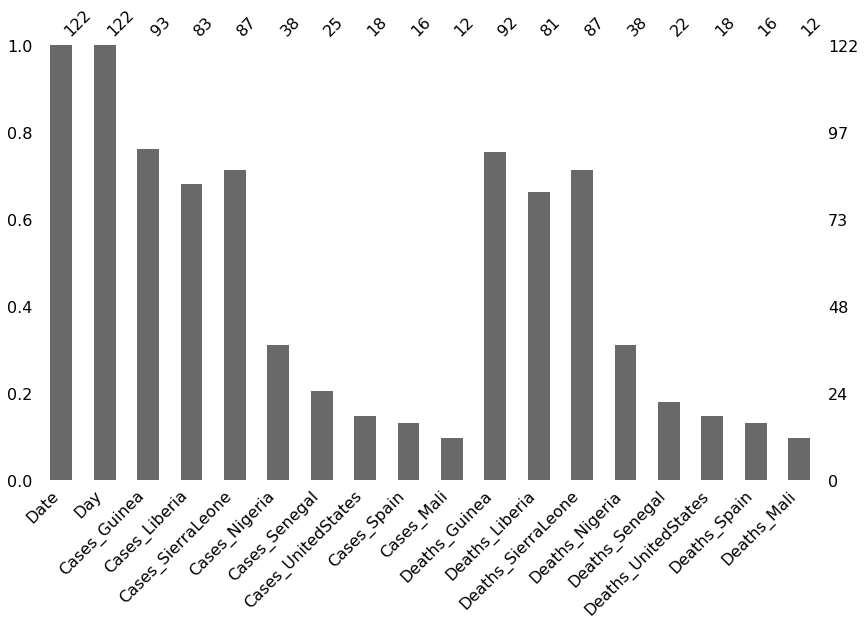

In [8]:
msno.bar(df=ebola, figsize=(14,8))

<AxesSubplot:>

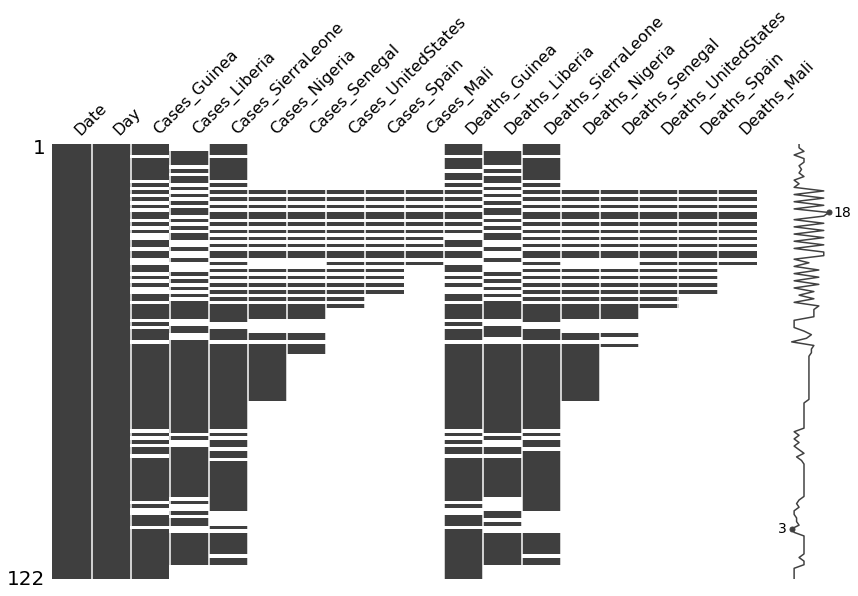

In [9]:
msno.matrix(df=ebola, figsize=(14,8))

### 누락값을 실제로 처리해보자!
- na값을 채우는 유명한 방법: fillna()

In [10]:
ebola.iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [11]:
ebola.fillna(0).iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [12]:
ebola.iloc[0:10, 0:5]["Cases_Liberia"].mean() # 0을 넣지 않았을 때!

8049.166666666667

In [13]:
ebola.fillna(0).iloc[0:10, 0:5]["Cases_Liberia"].mean() # 0으로 대체했을 때!

4829.5

### 다른 방법으로 누락값을 대체하는 법
- fillna(method=" ")
- ffill - 누락값이 나타나기 전의 값으로 누락값을 변경
- bfill - 누락값이 나타난 이후 첫번째 값으로 앞쪽의 누락값을 변경

In [14]:
ebola.fillna(method="ffill").iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2769.0,8157.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,8018.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7977.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [15]:
ebola.fillna(method="bfill").iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,8166.0,10030.0
1,1/4/2015,288,2775.0,8166.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2730.0,8157.0,9633.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7977.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7862.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [16]:
ebola.fillna(method="ffill").iloc[0:10, 0:5]["Cases_Liberia"].mean()

8036.25

In [17]:
ebola.fillna(method="bfill").iloc[0:10, 0:5]["Cases_Liberia"].mean()

8046.6

In [18]:
# 평균으로 대체합니다.
ebola.iloc[0:10, 0:5]["Cases_Liberia"].mean()

8049.166666666667

In [19]:
# 평균 값 8049.17
ebola.fillna(8049.17).iloc[0:10, 0:5]["Cases_Liberia"].mean()

8049.168

In [20]:
ebola.fillna(8049.17).iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.00,8049.17,10030.00
1,1/4/2015,288,2775.00,8049.17,9780.00
2,1/3/2015,287,2769.00,8166.00,9722.00
3,1/2/2015,286,8049.17,8157.00,8049.17
4,12/31/2014,284,2730.00,8115.00,9633.00
5,12/28/2014,281,2706.00,8018.00,9446.00
6,12/27/2014,280,2695.00,8049.17,9409.00
7,12/24/2014,277,2630.00,7977.00,9203.00
8,12/21/2014,273,2597.00,8049.17,9004.00
9,12/20/2014,272,2571.00,7862.00,8939.00


### 누락값을 대체하는 법
- 보간법
- interpolate(method=" ")
- 선형보간, spline 보간법

<AxesSubplot:>

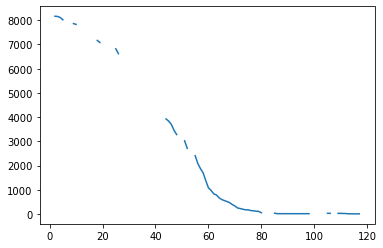

In [21]:
ebola["Cases_Liberia"].plot() # na값 때문에 그래프가 끊김

<AxesSubplot:>

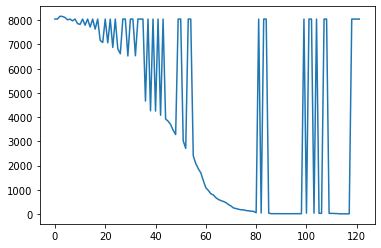

In [22]:
ebola.fillna(8049.17)["Cases_Liberia"].plot()

In [23]:
ebola.interpolate(method="linear")

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2749.5,8157.0,9677.5,NaN,NaN,NaN,NaN,NaN,1753.0,3496.0,2871.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:>

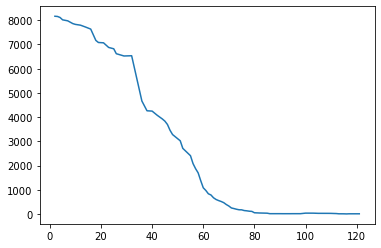

In [24]:
ebola.interpolate(method="linear")["Cases_Liberia"].plot()

### 스플라인 보간법
- 각 데이터의 포인트 구간별로 낮은 수준의 다항식 보간을 사용
- 직선으로 연결되는 보간법보다는 좀 더 부드럽게 연결이 되어서 다항식 항목을 선택한다.

In [25]:
ebola.interpolate(method="quadratic")

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.000000,NaN,10030.00000,NaN,NaN,NaN,NaN,NaN,1786.000000,NaN,2977.000000,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.000000,NaN,9780.00000,NaN,NaN,NaN,NaN,NaN,1781.000000,NaN,2943.000000,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.000000,8166.0,9722.00000,NaN,NaN,NaN,NaN,NaN,1767.000000,3496.0,2915.000000,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2753.419091,8157.0,9712.06134,NaN,NaN,NaN,NaN,NaN,1756.678716,3496.0,2880.357341,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.000000,8115.0,9633.00000,NaN,NaN,NaN,NaN,NaN,1739.000000,3471.0,2827.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.000000,8.0,6.00000,NaN,NaN,NaN,NaN,NaN,66.000000,6.0,5.000000,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

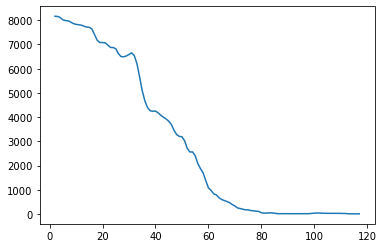

In [26]:
ebola.interpolate(method="quadratic")["Cases_Liberia"].plot()
# 선이 조금 더 자연스럽게 이어짐 (linear보다 부드러워짐)

method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'polynomial', 'krogh', 'piecewise_polynomial', 'pchip', 'akima', 'spline', 'from_derivatives']. Got 'dasd' instead.

### 열과 피벗
- 엑설에서 피벗의 개념
- melt 메서드를 이용해서 깔끔하게 데이터를 정리하는 데 유용하다!
- melt의 메서드 인자
- id_vars: 위치를 그대로 유지할 열의 이름을 지정 (given)
- value_vars: 행으로 위치를 변경할 열의 이름을 지정
- var_name: value_vars로 위치 변경할 열의 이름 지정 (new)
- value_name: var_name의 위치로 변경할 열의 데이터를 저장한 열의 이름

In [27]:
pew = pd.read_csv("pew.csv")

In [28]:
pd.melt(pew, id_vars="religion")

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [29]:
pd.melt(pew, id_vars="religion", var_name="income", value_name="count")

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


### 언제 melt를 사용합니까?

In [30]:
bill = pd.read_csv("billboard.csv")

In [31]:
bill

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
pd.melt(bill, id_vars=["year","artist","track","time","date.entered"], 
        var_name="week", value_name="rating")

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


### value에서 특정 패턴을 찾을 수도 있지만, 
### 위에서 본 것처럼 컬럼에서도 어떠한 패턴을 찾을 수 있다!

In [34]:
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
pd.melt(ebola, id_vars=["Date","Day"])

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [36]:
ebola_sp1=pd.melt(ebola, id_vars=["Date","Day"])

In [37]:
variable_sp1 = ebola_sp1.variable.str.split("_")

In [38]:
variable_sp1

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [39]:
case = variable_sp1.str.get(0)

In [40]:
variable_sp1[0][0]

'Cases'

In [41]:
case

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [42]:
case_values = variable_sp1.str.get(1)

In [43]:
case_values

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [44]:
ebola_sp1["case_vr"] = case
ebola_sp1["values_vr"] = case_values

In [45]:
ebola_sp1

,Date,Day,variable,value,case_vr,values_vr
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


### 필수과제
- 기상청 데이터에서 날씨 데이터를 받아오셔서 melt 함수를 이용해서 깔끔하게 정리해 주세요!
- 22년 10, 11월 / 21년 10, 11월 두 개를 비교해서 날씨에 대한 비교도 간단하게 부탁드릴게요!